In [110]:
import sys
sys.path.append(r'C:/Users/dskapinakis/Documents/web_scraping')
import pandas as pd
import scraper as scr
from transformer import Transform
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# click url before scraping for bot detection and check how many pages to scrape 
scr.base_url('rent', 're_residence', scr.geo_ids['gyzi'])

'https://www.xe.gr/en/property/results?transaction_name=rent&item_type=re_residence&sorting=create_desc&geo_place_ids%5B%5D=ChIJXcJaXLOioRQRM1r_V3pg178'

In [4]:
# scrape data
data = scr.batch_scraping('gyzi', 'rent', 're_residence', 10)

# Append batches in a final dataframe
concat_data = pd.concat([data[i] for i in list(data.keys())], axis=0)

Scraping data for gyzi...  (details: rent, re_residence)
Batch 0:
Number of properties collected:  68
Batch 1:
Number of properties collected:  68
Batch 2:
Number of properties collected:  68
Batch 3:
Number of properties collected:  68
Batch 4:
Number of properties collected:  68


In [14]:
data_transformed = Transform(concat_data)
data_transformed

,Style,Furnished,Suitable for professional use,Floor,Location,Heating Method,Bedrooms,Fireplace,Short term rental,Bathrooms,...,Energy Class,publication_Date,Renovation year,Tents,Night electricity tariff,Storage room,Garden,No maintenance fees,Heating,Heating System
0,Not specified,0.0,0.0,Elevated Ground Floor,Athens (Pedion tou Areos),Not specified,2.0,0.0,0.0,1.0,...,Pending,2024-08-11,Not specified,0.0,0.0,0,0,0.0,1,Not specified
1,Not specified,1.0,0.0,2nd,Athens (Lycabettus),Not specified,Not specified,0.0,0.0,1.0,...,Η,2024-08-13,2024.0,0.0,0.0,0,0,0.0,1,Autonomous heating centrally installed
2,Not specified,1.0,0.0,5th,Athens (Ippokratous),Oil,Not specified,0.0,1.0,1.0,...,Pending,2024-08-13,Not specified,1.0,0.0,0,0,0.0,1,Central heating
3,Not specified,1.0,0.0,3rd,Athens (Lycabettus),Electricity,2.0,0.0,0.0,1.0,...,Ε,2024-08-10,2023.0,1.0,0.0,0,0,0.0,1,Autonomous heating centrally installed
4,Not specified,1.0,1.0,Ground floor,Athens (Ippokratous),Natural gas,1.0,0.0,0.0,1.0,...,Pending,2024-08-14,2024.0,0.0,0.0,0,0,0.0,1,Central heating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Not specified,1.0,0.0,1st,Athens (Kountouriotika),Not specified,1.0,0.0,0.0,1.0,...,D,2024-07-28,2020.0,0.0,0.0,0,0,0.0,1,Central heating
64,Not specified,0.0,1.0,3rd,Athens (Exarcheia),Not specified,3.0,0.0,0.0,1.0,...,Pending,2024-07-26,2024.0,0.0,0.0,0,0,0.0,1,Not specified
65,Not specified,0.0,1.0,5th,Athens (Pedion tou Areos),Not specified,2.0,0.0,0.0,Not specified,...,Α+,2024-07-29,2024.0,1.0,0.0,Storage room,0,0.0,1,Central heating
66,Not specified,0.0,0.0,4th,Athens (Neapoli),Not specified,2.0,0.0,0.0,2.0,...,D,2024-07-29,Not specified,1.0,0.0,Storage room,0,0.0,1,Not specified


In [ ]:
## pithana targets: price, visits, saves

## EDA

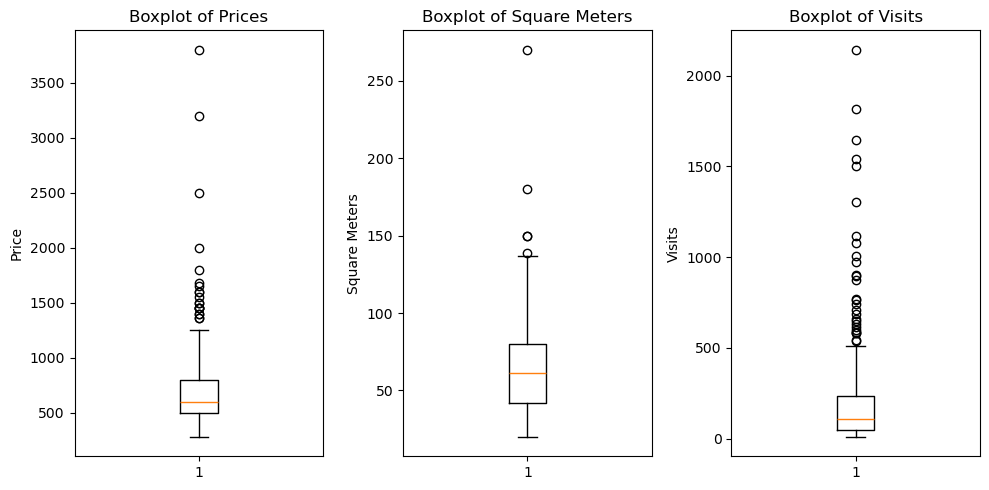

In [66]:
import matplotlib.pyplot as plt

# Assuming 'Price', 'Square Meters', and 'Visits' columns exist in your DataFrame
prices = data_transformed['Price']
square_meters = data_transformed['Square Meters']
visits = data_transformed['visits']

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Boxplot for Price
axs[0].boxplot(prices)
axs[0].set_title('Boxplot of Prices')
axs[0].set_ylabel('Price')

# Boxplot for Square Meters
axs[1].boxplot(square_meters)
axs[1].set_title('Boxplot of Square Meters')
axs[1].set_ylabel('Square Meters')

# Boxplot for Visits
axs[2].boxplot(visits)
axs[2].set_title('Boxplot of Visits')
axs[2].set_ylabel('Visits')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


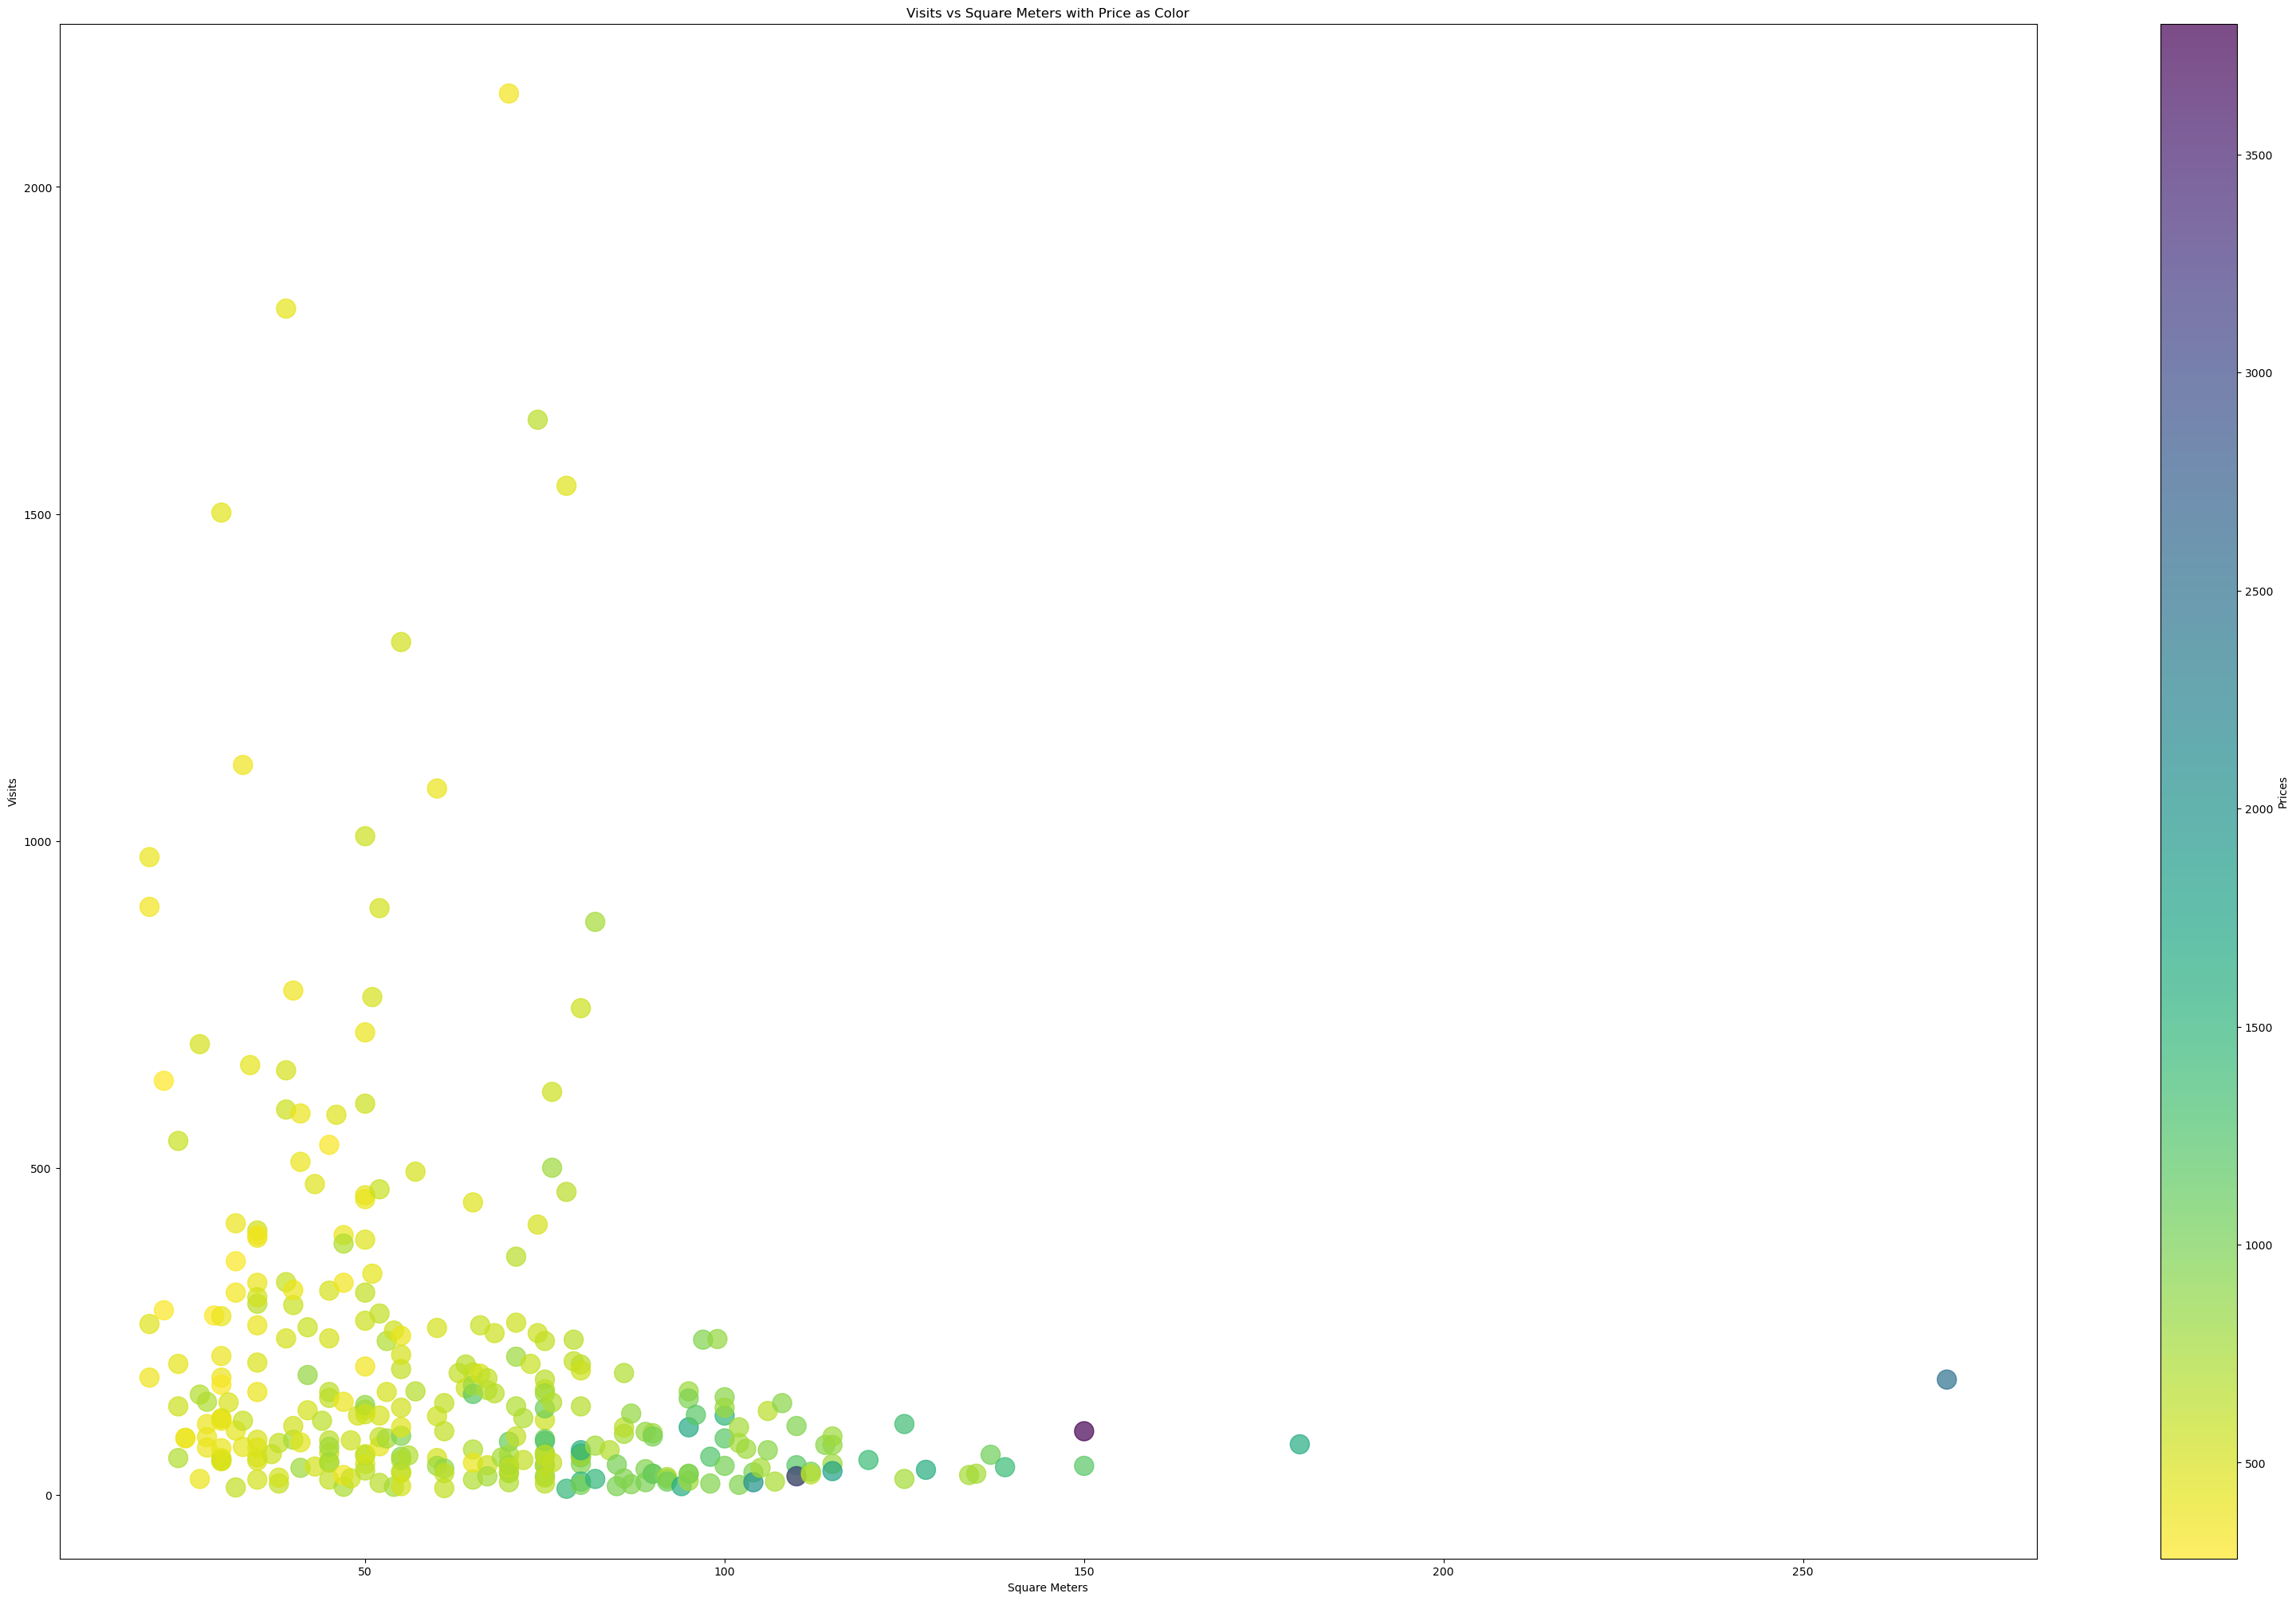

In [49]:
# Sort the DataFrame based on square meters
df_sorted = data_transformed.sort_values(by='Square Meters')

# Extracting sorted data from DataFrame
prices_sorted = df_sorted['Price']
locations_sorted = df_sorted['Location']
square_meters_sorted = df_sorted['Square Meters']
visits_sorted = df_sorted['visits']  # Assuming 'Visits' is the column representing the number of visits

# Creating scatter plot
plt.figure(figsize=(40, 25))
scatter = plt.scatter(square_meters_sorted, visits_sorted, c=prices_sorted, cmap='viridis_r', alpha=0.7, s=300)

# Adding color bar for the visits
cbar = plt.colorbar(scatter)
cbar.set_label('Prices')

# Adding labels and title
plt.xlabel('Square Meters')
plt.ylabel('Visits')
plt.title('Visits vs Square Meters with Price as Color')

plt.show()


## Regression Analysis

In [198]:
data_transformed['Energy Class'].value_counts()

Energy Class
Pending     106
D            38
Ε            34
Η            23
C            23
Ζ            23
Β            19
Α            15
Α+            9
Β+            8
Exempted      7
Name: count, dtype: int64

In [ ]:
## drops: Garden giati polla midenika, storage giati polla midenika, PLot area drop polla midenika, 

ohe:
- Heating Method
- Heating System

ordinal:
- energy class

In [177]:
cat_cols = [col for col in data_transformed.columns if data_transformed[col].dtype == 'object']
num_cols = [col for col in data_transformed.columns if data_transformed[col].dtype != 'object']

In [178]:
cat_cols

['Style',
 'Floor',
 'Location',
 'Heating Method',
 'Bedrooms',
 'Bathrooms',
 'Parking',
 'Floor type',
 'Zone',
 'View',
 'Plot area',
 'link',
 'Year Built',
 'Condition',
 'Energy Class',
 'Renovation year',
 'Storage room',
 'Garden',
 'Heating System']

In [ ]:
## apo cat_cols drop link, location

In [213]:
import statsmodels.api as sm

# Independent variables (add a constant term to the model)
X = data_transformed[num_cols].drop(columns = ['visits','saves','Price','publication_Date'])
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model

# Dependent variable
y = data_transformed['Price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     27.39
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           7.03e-47
Time:                        15:19:35   Log-Likelihood:                -2113.1
No. Observations:                 305   AIC:                             4258.
Df Residuals:                     289   BIC:                             4318.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [224]:
model.pvalues.max()

0.9204087138619175

In [220]:
import statsmodels.api as sm

# Define the function for backward elimination
def backward_elimination(X, y, significance_level=0.05):W
    num_vars = len(X.columns)
    for i in range(num_vars):
        # Fit the model with the current set of variables
        model = sm.OLS(y, X).fit()
        # Get the highest p-value of the variables
        max_p_value = model.pvalues.max()
        
        # If the highest p-value is greater than the significance level, remove that variable
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            print(f"Dropping '{excluded_feature}' with p-value {max_p_value}")
            X = X.drop(columns=[excluded_feature])   
        else:
            break
    return X, model

# Perform backward elimination
X_opt, model_opt = backward_elimination(X, y)

# Print the summary of the final model
print(model_opt.summary())


Dropping 'Suitable for professional use' with p-value 0.9204087138619175
Dropping 'No maintenance fees' with p-value 0.8434503265069099
Dropping 'No elevator' with p-value 0.5324528590787376
Dropping 'const' with p-value 0.40595895641781155
Dropping 'Aluminium frames' with p-value 0.45314054095284173
Dropping 'Heating' with p-value 0.3418014101541158
Dropping 'Solar water heater' with p-value 0.23037973891396749
Dropping 'Night electricity tariff' with p-value 0.19005987076836275
Dropping 'Fireplace' with p-value 0.3122169259968534
Dropping 'Short term rental' with p-value 0.07307701556869955
Dropping 'Security door' with p-value 0.06564606069041894
                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          

In [208]:
import statsmodels.api as sm

# Independent variables (add a constant term to the model)
X = data_transformed[good_cols]
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model

# Dependent variable
y = data_transformed['visits']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 visits   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     12.45
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.06e-07
Time:                        15:04:21   Log-Likelihood:                -2143.1
No. Observations:                 305   AIC:                             4294.
Df Residuals:                     301   BIC:                             4309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 365.3142    

In [207]:
good_cols = ['No elevator','Price', 'No maintenance fees' ]